<img src="http://cfs22.simplicdn.net/ice9/new_logo.svgz "/>

# Project 2: Lending Club Loan Data Analysis

* * *

<img src="https://imprumut.md/wp-content/uploads/2022/07/tipuri-de-creditare-imprumut-md.jpg"/>

**DESCRIPTION**

Create a model that predicts whether or not a loan will be default using the historical data.


**Problem Statement**:

For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using the historical data from 2007 to 2015, you have to build a deep learning model to predict the chance of default for future loans. As you will see later this dataset is highly imbalanced and includes a lot of features that make this problem more challenging.

**Domain: Finance**

Analysis to be done: Perform data preprocessing and build a deep learning prediction model.

*Content*:

Dataset columns and definition:



*   *credit.policy*: 1 if the customer meets the credit underwriting criteria of


LendingClub.com, and 0 otherwise.

*   *purpose*: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

*   *int.rate*: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

*   *installment*: The monthly installments owed by the borrower if the loan is funded.

*   *log.annual.inc*: The natural log of the self-reported annual income of the borrower.

*   *dti*: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

*   *fico*: The FICO credit score of the borrower.

*   *days.with.cr.line*: The number of days the borrower has had a credit line.

*   *revol.bal*: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

*   *revol.util*: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

*   *inq.last.6mths*: The borrower's number of inquiries by creditors in the last 6 months.

*   *delinq.2yrs*: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

*   *pub.rec*: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).



**Steps to perform:**

Perform exploratory data analysis and feature engineering and then apply feature engineering. Follow up with a deep learning model to predict whether or not the loan will be default using the historical data.

**Tasks:**

1.     Feature Transformation

Transform categorical values into numerical values (discrete)

2.     Exploratory data analysis of different factors of the dataset.

3.     Additional Feature Engineering

You will check the correlation between features and will drop those features which have a strong correlation

This will help reduce the number of features and will leave you with the most relevant features

4.     Modeling

After applying EDA and feature engineering, you are now ready to build the predictive models

In this part, you will create a deep learning model using Keras with Tensorflow backend

#Install library

In [ ]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.3 MB/s 


In [ ]:
from livelossplot import PlotLossesKerasTF

#Import library

In [ ]:
#Import the necessary library
import matplotlib.pyplot as plt
import pandas as pd
import re
import numpy as np
import seaborn as sns

In [ ]:
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, Conv1D
from tensorflow.keras.layers import Flatten, Reshape
from tensorflow.keras import Model

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import losses

In [ ]:
import tensorflow as tf

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

#Data manipulation

##Data aquisition

In [ ]:
pd_df_loan_data = pd.read_csv('/content/loan_data.csv')

In [ ]:
#show first 5 records
pd_df_loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
pd_df_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
pd_df_loan_data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [ ]:
pd_df_loan_data.describe(include=[object])

,purpose
count,9578
unique,7
top,debt_consolidation
freq,3957


##Feature Transformation

In [ ]:
#select target column
target_col = 'not.fully.paid'

In [ ]:
#select feature
lst_feature_ = pd_df_loan_data.columns[pd_df_loan_data.columns != target_col]

###Label encode

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
le.fit(pd_df_loan_data['purpose'])

LabelEncoder()

In [ ]:
le.classes_

array(['all_other', 'credit_card', 'debt_consolidation', 'educational',
       'home_improvement', 'major_purchase', 'small_business'],
      dtype=object)

In [ ]:
pd_df_loan_data['purpose'] = le.transform(pd_df_loan_data['purpose'])

In [ ]:
pd_df_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   int64  
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(8)
memory usage: 1.0 MB


In [ ]:
pd_df_loan_data.describe()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,1.944038,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,1.686881,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,6.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


###Normalization

In [ ]:
pd_df_desc = pd_df_loan_data[lst_feature_].describe()

In [ ]:
pd_df_loan_data[lst_feature_] = (pd_df_loan_data[lst_feature_] - pd_df_desc.loc['min']) / (pd_df_desc.loc['max'] - pd_df_desc.loc['min'])

In [ ]:
pd_df_loan_data.describe()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.324006,0.400512,0.328209,0.484843,0.420784,0.459750,0.250948,0.014009,0.393271,0.047802,0.012593,0.012424,0.160054
std,0.396245,0.281147,0.171656,0.223989,0.088071,0.229772,0.176607,0.143000,0.027959,0.243819,0.066674,0.042017,0.052425,0.366676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.166667,0.280691,0.160200,0.431310,0.240738,0.325581,0.151254,0.002640,0.189916,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.333333,0.397059,0.273973,0.484379,0.422730,0.441860,0.226848,0.007120,0.389076,0.030303,0.000000,0.000000,0.000000
75%,1.000000,0.333333,0.515985,0.451169,0.536294,0.599132,0.581395,0.317911,0.015115,0.595798,0.060606,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##Exploratory data analysis of different factors of the dataset

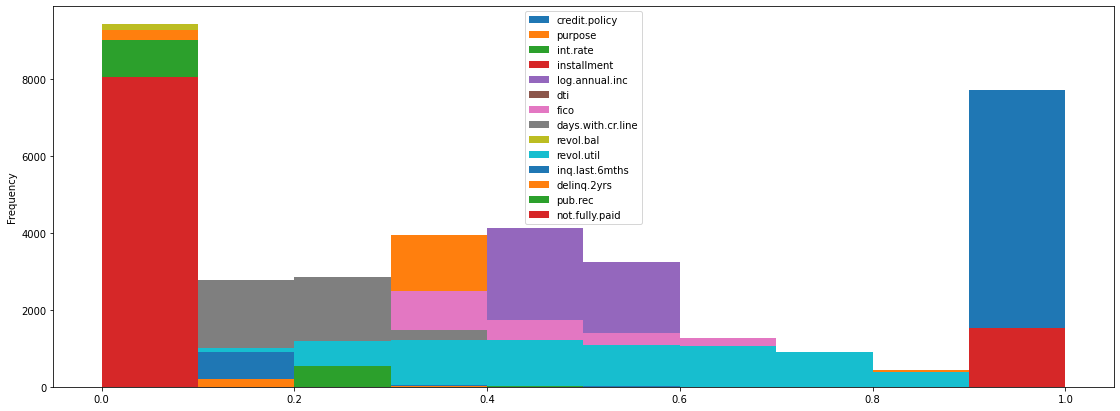

In [ ]:
plt.rcParams["figure.figsize"] = (19, 7)
pd_df_loan_data.plot.hist()

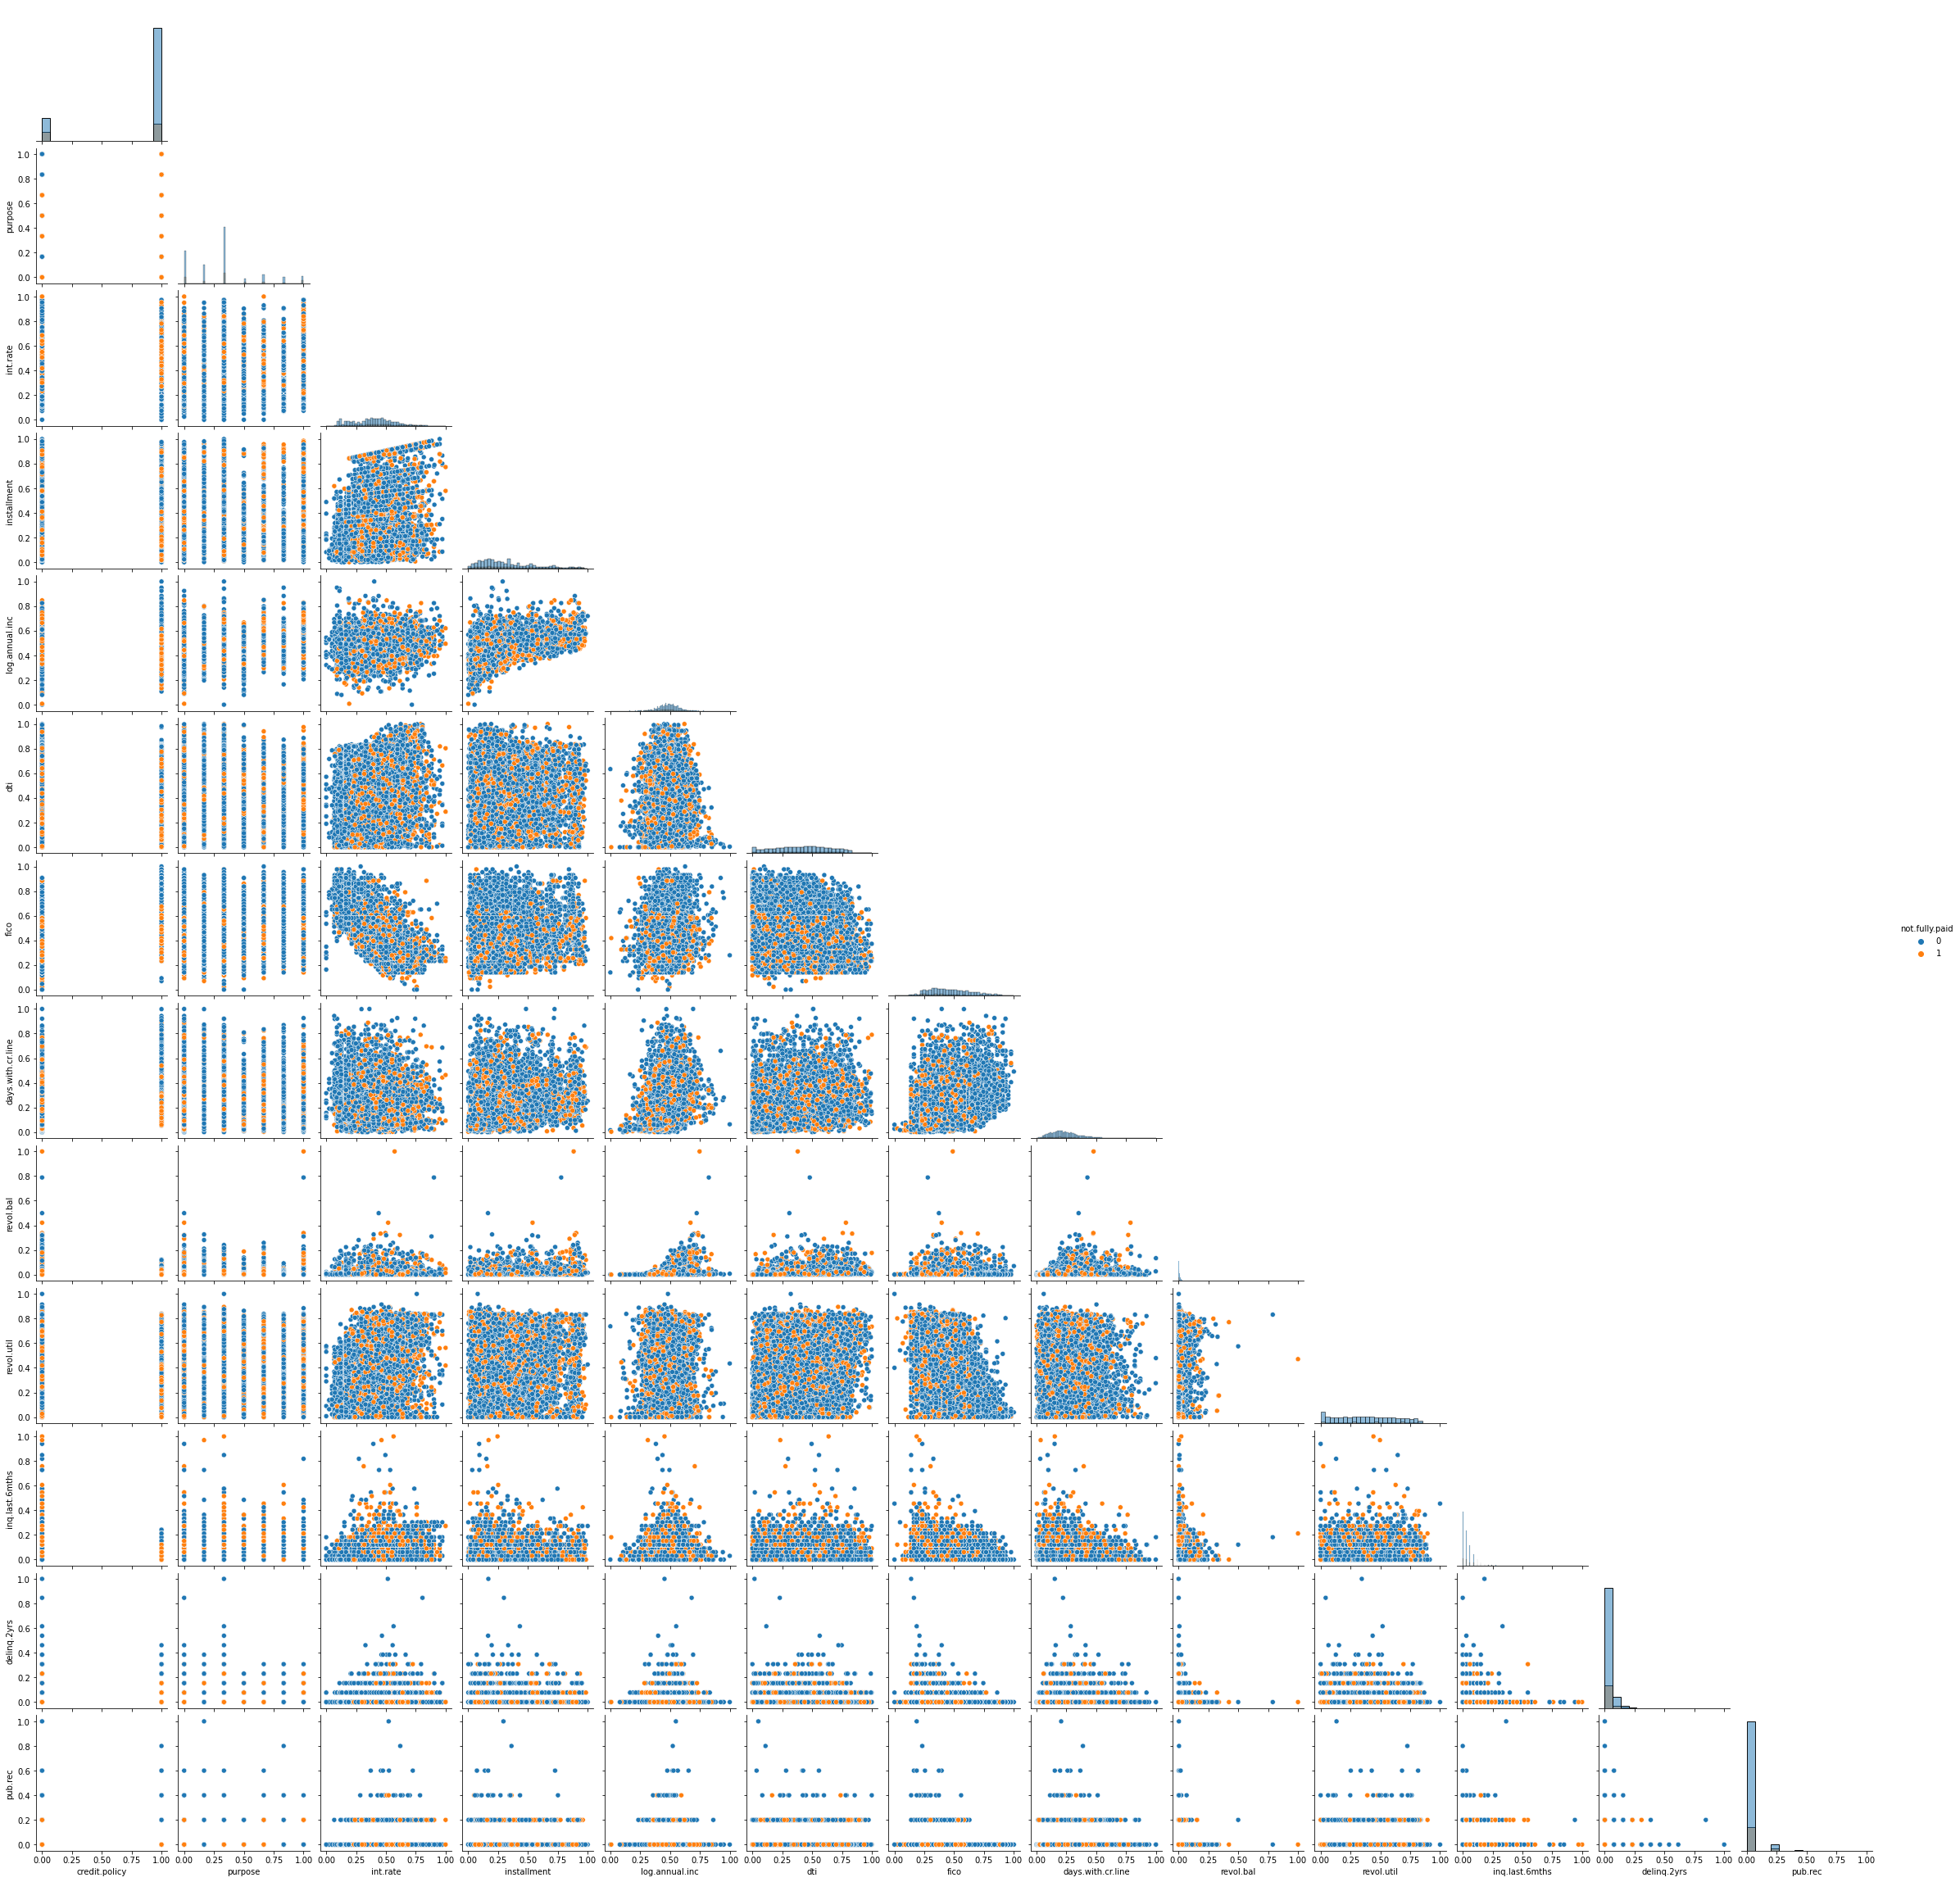

In [ ]:
sns.pairplot(pd_df_loan_data, corner=True, hue=target_col, diag_kind="hist")

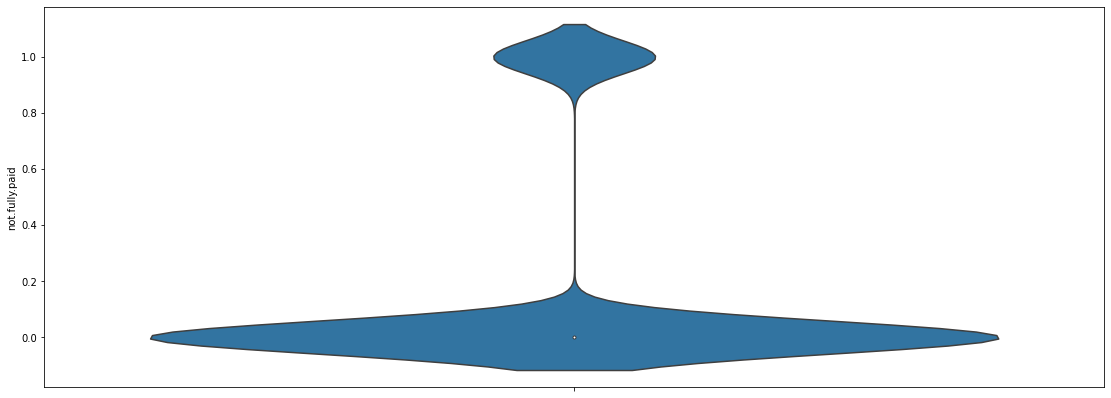

In [ ]:
sns.violinplot(data=pd_df_loan_data, y=target_col, hue=target_col, split=True)

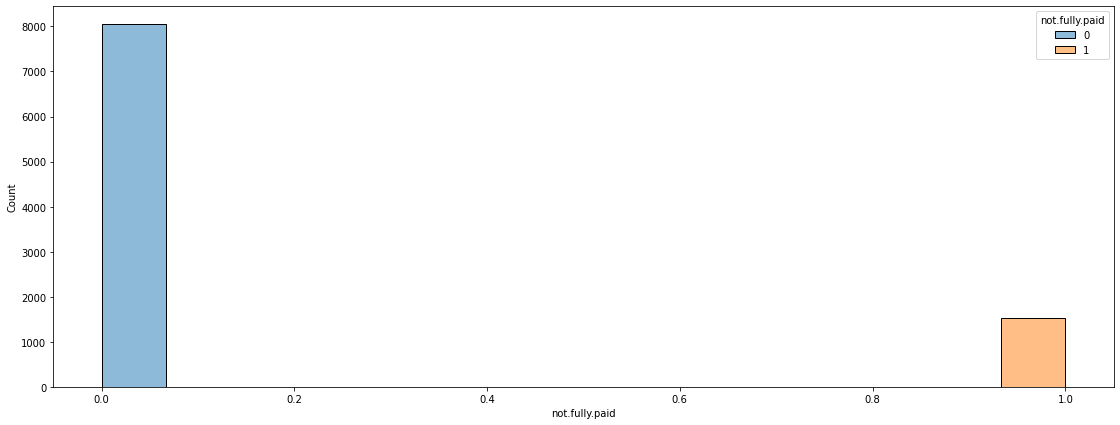

In [ ]:
sns.histplot(data=pd_df_loan_data, x=target_col, hue=target_col)

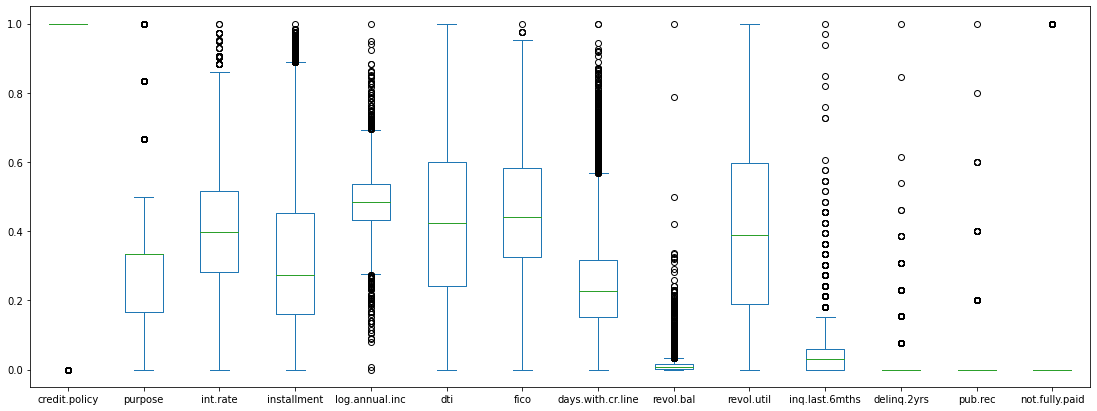

In [ ]:
plt.rcParams["figure.figsize"] = (19, 7)
pd_df_loan_data.plot.box()

In [ ]:
pd_df_loan_data[lst_feature_].duplicated().sum()

0

##Additional Feature Engineering

###Check the correlation between features

In [ ]:
pd_df_loan_data.corr()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,0.017569,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
purpose,0.017569,1.000000,0.117067,0.154827,0.088958,-0.053279,0.057337,0.047526,0.042364,-0.062947,0.037516,-0.011701,0.004793,0.047907
int.rate,-0.294089,0.117067,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.154827,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,0.034906,0.088958,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,-0.053279,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,0.057337,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days.with.cr.line,0.099026,0.047526,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol.bal,-0.187518,0.042364,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol.util,-0.104095,-0.062947,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088


###Drop features which have a strong correlation

###Reduce the number of features

In [ ]:
reduce_feature = lst_feature_.copy()

In [ ]:
reduce_feature = reduce_feature.drop(['credit.policy', 'delinq.2yrs', 'pub.rec'])

###Keep the most relevant features

##Split data

In [ ]:
#cast to numpy
np_feature = pd_df_loan_data[lst_feature_].to_numpy()
np_target = pd_df_loan_data[target_col].to_numpy().reshape(pd_df_loan_data.shape[0], 1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(np_feature, np_target, test_size=0.25)

##Separate the fully paid loan from the not fully paid loan

In [ ]:
np_train_paid_idx = np.argwhere(Y_train.reshape(Y_train.shape[0]) == 0).flatten()
paid_train_data = X_train[np_train_paid_idx]

np_train_not_paid_idx = np.argwhere(Y_train.reshape(Y_train.shape[0]) == 1).flatten()
not_paid_train_data = X_train[np_train_not_paid_idx]

np_test_paid_idx = np.argwhere(Y_test.reshape(Y_test.shape[0]) == 0).flatten()
paid_test_data = X_test[np_test_paid_idx]

np_test_not_paid_idx = np.argwhere(Y_test.reshape(Y_test.shape[0]) == 1).flatten()
not_paid_test_data = X_test[np_test_not_paid_idx]

#Modeling

##Clasification model

###Build the predictive model

In [ ]:
class NotFullyPaid():
  def __init__(self, input_size, output_size):

    self.input_layer = Input(shape=input_size,
                            name="Input",
                            dtype=np.float32,
                            )
    self.output_size = output_size

  def getModelX(self):
    x = Dense(int(input_size * 3),
              use_bias=True,
              activation='relu'
              )(self.input_layer)
    x = Reshape((int(input_size * 3), 1),
                input_shape=(int(input_size * 3),)
                )(x)
    x = layers.BatchNormalization()(x)

    x = Conv1D(filters=128,
              kernel_size=3,
              activation='relu'
              )(x)
    x = layers.BatchNormalization()(x)
    x = Conv1D(filters=128,
              kernel_size=3,
              activation='relu'
              )(x)
    x = layers.Dropout(.2)(x)
    x = Conv1D(filters=1,
              kernel_size=3,
              activation='relu'
              )(x)
    x = layers.BatchNormalization()(x)
    self.flatten_x = Flatten()(x)
    self.out_layer_x = Dense(self.output_size,
              activation='sigmoid'
              )(self.flatten_x)

    tmp_m = Model(self.input_layer, self.out_layer_x)
    return tmp_m


  def getModelY(self):
    y = Dense(int(input_size * 2),
              use_bias=True,
              activation='relu'
              )(self.input_layer)
    y = Reshape((int(input_size * 2), 1),
                input_shape=(int(input_size * 2),)
                )(y)
    y = layers.BatchNormalization()(y)

    y = Conv1D(filters=64,
              kernel_size=7,
              activation='relu'
              )(y)
    y = layers.Dropout(.3)(y)
    y = Conv1D(filters=64,
              kernel_size=5,
              activation='relu'
              )(y)
    y = layers.BatchNormalization()(y)
    y = Conv1D(filters=1,
              kernel_size=5,
              activation='relu'
              )(y)
    y = layers.BatchNormalization()(y)
    self.flatten_y = Flatten()(y)
    self.out_layer_y = Dense(self.output_size,
              activation='sigmoid'
              )(self.flatten_y)
    tmp_m = Model(self.input_layer, self.out_layer_y)
    return tmp_m

  def getModelZ(self):
    z = Dense(int(input_size * 2),
              use_bias=True,
              activation='relu'
              )(self.input_layer)
    z = layers.BatchNormalization()(z)
    z = Dense(int(input_size),
              use_bias=True,
              activation='relu'
              )(z)
    self.flatten_z = layers.Dropout(.25)(z)
    self.out_layer_z = Dense(self.output_size,
              activation='sigmoid'
              )(self.flatten_z)

    tmp_m = Model(self.input_layer, self.out_layer_z)
    return tmp_m

  def getModelG(self):
    g = layers.concatenate([self.flatten_x, self.flatten_y, self.flatten_z], axis=1)
    g = Flatten()(g)
    #g = layers.Layer(trainable=False)(g)

    g.trainable = False
    self.out_layer_g = Dense(output_size,
              activation='sigmoid'
              )(g)
    tmp_m = Model(self.input_layer, self.out_layer_g)
    return tmp_m

  def getModelAvg(self):
    self.output_avg_layer = layers.Average()([self.out_layer_x,
                                              self.out_layer_y,
                                              self.out_layer_z,
                                              self.out_layer_g])
    tmp_m = Model(self.input_layer, self.output_avg_layer)
    return tmp_m



###get model

In [ ]:
input_size = np_feature.shape[1]
output_size = np_target.shape[1]

In [ ]:
model_ = NotFullyPaid(input_size, output_size)

##Model x

###Compile

In [ ]:
notFP_model_x = model_.getModelX()

In [ ]:
notFP_model_x.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 13)]              0         
                                                                 
 dense_24 (Dense)            (None, 39)                546       
                                                                 
 reshape_2 (Reshape)         (None, 39, 1)             0         
                                                                 
 batch_normalization_17 (Bat  (None, 39, 1)            4         
 chNormalization)                                                
                                                                 
 conv1d_6 (Conv1D)           (None, 37, 128)           512       
                                                                 
 batch_normalization_18 (Bat  (None, 37, 128)          512       
 chNormalization)                                          

In [ ]:
notFP_model_x.compile(optimizer='adam',
              loss='mse', metrics=['accuracy'])

###Fit the model

In [ ]:
np_idx_model_x = np.concatenate((np_train_not_paid_idx, np_train_paid_idx[5000:]))

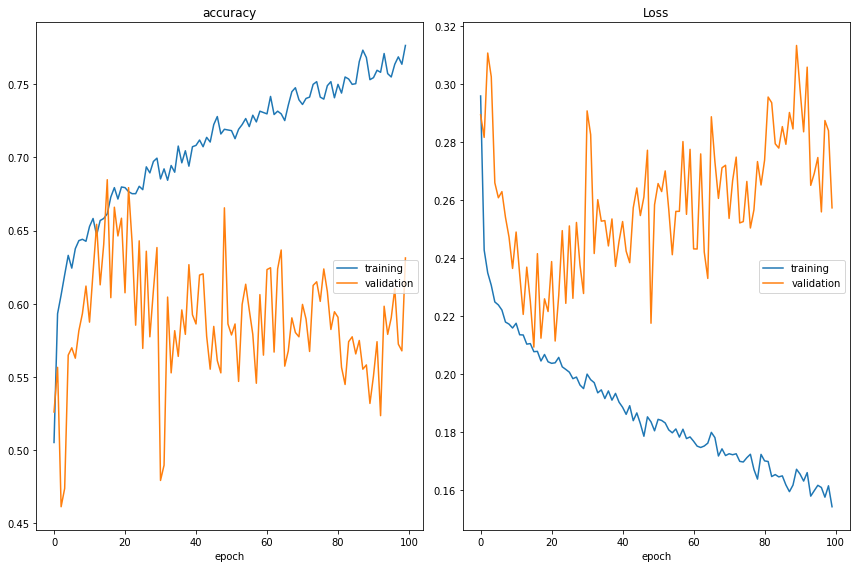

accuracy
	training         	 (min:    0.505, max:    0.776, cur:    0.776)
	validation       	 (min:    0.461, max:    0.685, cur:    0.631)
Loss
	training         	 (min:    0.154, max:    0.296, cur:    0.154)
	validation       	 (min:    0.209, max:    0.313, cur:    0.257)
22/22 [==============================] - 2s 89ms/step - loss: 0.1542 - accuracy: 0.7765 - val_loss: 0.2573 - val_accuracy: 0.6313


In [ ]:
notFP_model_x.fit(X_train[np_idx_model_x], Y_train[np_idx_model_x],
              validation_data=(X_test, Y_test),
              epochs=100,
              batch_size=100,
              callbacks=[PlotLossesKerasTF()]
              )

##Model y

###Compile

In [ ]:
notFP_model_y = model_.getModelY()

In [ ]:
notFP_model_y.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 13)]              0         
                                                                 
 dense_26 (Dense)            (None, 26)                364       
                                                                 
 reshape_3 (Reshape)         (None, 26, 1)             0         
                                                                 
 batch_normalization_20 (Bat  (None, 26, 1)            4         
 chNormalization)                                                
                                                                 
 conv1d_9 (Conv1D)           (None, 20, 64)            512       
                                                                 
 dropout_4 (Dropout)         (None, 20, 64)            0         
                                                           

In [ ]:
notFP_model_y.compile(optimizer='adam',
              loss='mse', metrics=['accuracy'])

###Fit the model




In [ ]:
np_idx_model_y = np.concatenate((np_train_not_paid_idx, np_train_paid_idx[3000:5000]))

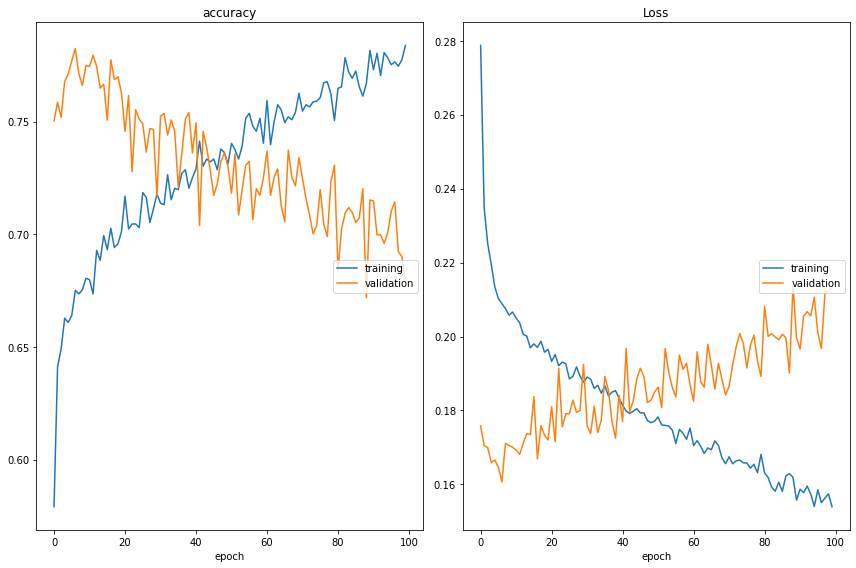

accuracy
	training         	 (min:    0.579, max:    0.784, cur:    0.784)
	validation       	 (min:    0.672, max:    0.782, cur:    0.680)
Loss
	training         	 (min:    0.154, max:    0.279, cur:    0.154)
	validation       	 (min:    0.161, max:    0.214, cur:    0.213)
25/25 [==============================] - 1s 45ms/step - loss: 0.1540 - accuracy: 0.7838 - val_loss: 0.2132 - val_accuracy: 0.6797


In [ ]:
notFP_model_y.fit(X_train[np_idx_model_y], Y_train[np_idx_model_y],
              validation_data=(X_test, Y_test),
              epochs=100,
              batch_size=127,
              callbacks=[PlotLossesKerasTF()]
              )

##Model z

###Compile

In [ ]:
notFP_model_z = model_.getModelZ()

In [ ]:
notFP_model_z.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 13)]              0         
                                                                 
 dense_28 (Dense)            (None, 26)                364       
                                                                 
 batch_normalization_23 (Bat  (None, 26)               104       
 chNormalization)                                                
                                                                 
 dense_29 (Dense)            (None, 13)                351       
                                                                 
 dropout_5 (Dropout)         (None, 13)                0         
                                                                 
 dense_30 (Dense)            (None, 1)                 14        
                                                           

In [ ]:
notFP_model_z.compile(optimizer='adam',
              loss='mse', metrics=['accuracy'])

###Fit the model

In [ ]:
np_idx_model_z = np.concatenate((np_train_not_paid_idx, np_train_paid_idx[:3000]))

In [ ]:
np_idx_model_z.shape

(4155,)

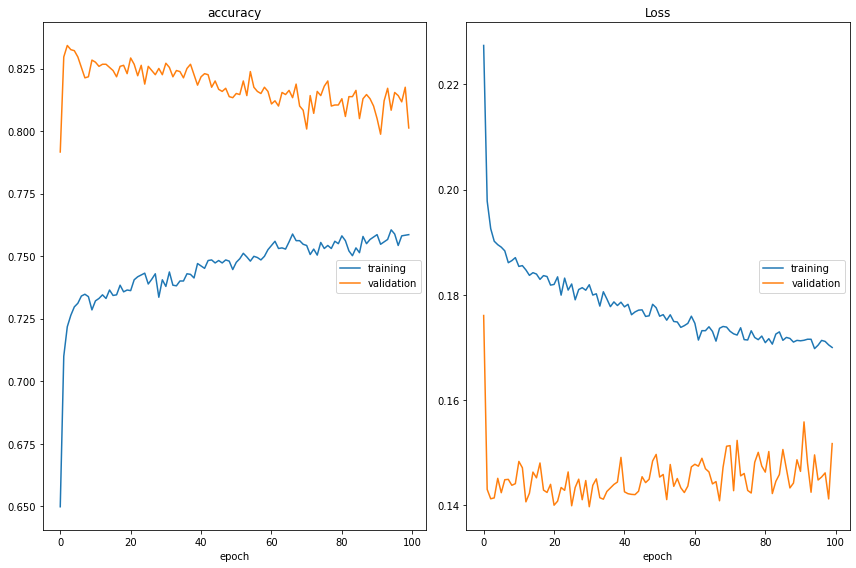

accuracy
	training         	 (min:    0.650, max:    0.761, cur:    0.759)
	validation       	 (min:    0.792, max:    0.834, cur:    0.801)
Loss
	training         	 (min:    0.170, max:    0.227, cur:    0.170)
	validation       	 (min:    0.140, max:    0.176, cur:    0.152)
64/64 [==============================] - 1s 10ms/step - loss: 0.1700 - accuracy: 0.7586 - val_loss: 0.1517 - val_accuracy: 0.8013


In [ ]:
notFP_model_z.fit(X_train[np_idx_model_z], Y_train[np_idx_model_z],
              validation_data=(X_test, Y_test),
              epochs=100,
              batch_size=65,
              callbacks=[PlotLossesKerasTF()]
              )

##Model g

###Compile

In [ ]:
notFP_model_g = model_.getModelG()

In [ ]:
notFP_model_g.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input (InputLayer)             [(None, 13)]         0           []                               
                                                                                                  
 dense_24 (Dense)               (None, 39)           546         ['Input[0][0]']                  
                                                                                                  
 dense_26 (Dense)               (None, 26)           364         ['Input[0][0]']                  
                                                                                                  
 reshape_2 (Reshape)            (None, 39, 1)        0           ['dense_24[0][0]']               
                                                                                           

In [ ]:
notFP_model_g.compile(optimizer='adam',
              loss='mse', metrics=['accuracy'])

###Fit the model

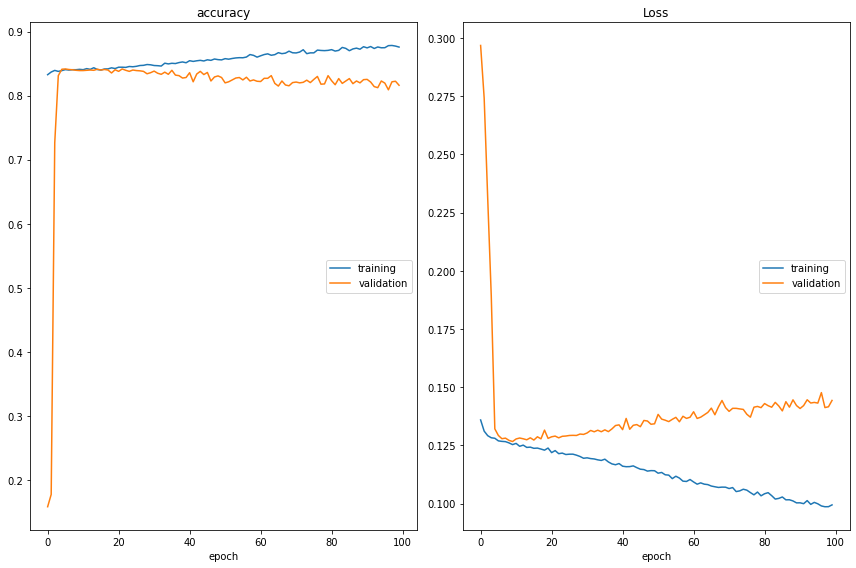

accuracy
	training         	 (min:    0.833, max:    0.878, cur:    0.876)
	validation       	 (min:    0.158, max:    0.842, cur:    0.816)
Loss
	training         	 (min:    0.099, max:    0.136, cur:    0.099)
	validation       	 (min:    0.127, max:    0.297, cur:    0.144)
94/94 [==============================] - 6s 60ms/step - loss: 0.0995 - accuracy: 0.8760 - val_loss: 0.1443 - val_accuracy: 0.8163


In [ ]:
notFP_model_g.fit(X_train, Y_train,
              validation_data=(X_test, Y_test),
              epochs=100,
              batch_size=77,
              callbacks=[PlotLossesKerasTF()]
              )

##Model avg

###Compile

In [ ]:
notFP_model_avg = model_.getModelAvg()

In [ ]:
notFP_model_avg.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input (InputLayer)             [(None, 13)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 39)           546         ['Input[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 26)           364         ['Input[0][0]']                  
                                                                                                  
 reshape (Reshape)              (None, 39, 1)        0           ['dense[0][0]']                  
                                                                                            

In [ ]:
notFP_model_avg.compile(optimizer='adam',
              loss='mse', metrics=['accuracy'])

##Predict

In [ ]:

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))
  (tp, fp), (fn, tn)  = confusion_matrix(labels, predictions)
  print("Confusion matrix: tp {}, fp {}, fn {}, tn {}".format(tp, fp, fn, tn))



In [ ]:
Y_pred = notFP_model_avg.predict(X_train)
Y_pred = np.around(Y_pred).astype(np.int32)

In [ ]:
Y_pred.shape

(7183, 1)

In [ ]:
print_stats(Y_pred, Y_train)

Accuracy = 0.8560490045941807
Precision = 0.5971107544141252
Recall = 0.3220779220779221
Confusion matrix: tp 5777, fp 251, fn 783, tn 372


In [ ]:
Y_pred = notFP_model_avg.predict(X_test)
Y_pred = np.around(Y_pred).astype(np.int32)

In [ ]:
print_stats(Y_pred, Y_test)

Accuracy = 0.8075156576200417
Precision = 0.2955665024630542
Recall = 0.15873015873015872
Confusion matrix: tp 1874, fp 143, fn 318, tn 60


##Anomaly detection

Overview

In this example, we will train an autoencoder to detect anomalies on the Lending Club Loan Data Analysis dataset. We will use a simplified version of the dataset, where each example has been labeled either 0 (fully paid), or 1 (not fully paid). We are interested in identifying the not fully paid loan.


How will we detect fully paid loan using an autoencoder? Recall that an autoencoder is trained to minimize reconstruction error. We will train an autoencoder on the fully paid loan only, then use it to reconstruct all the data. Our hypothesis is that the not fully paid loan will have higher reconstruction error. We will then classify a loan data as a fully paid if the reconstruction error surpasses a fixed threshold.

Plot a paid loan

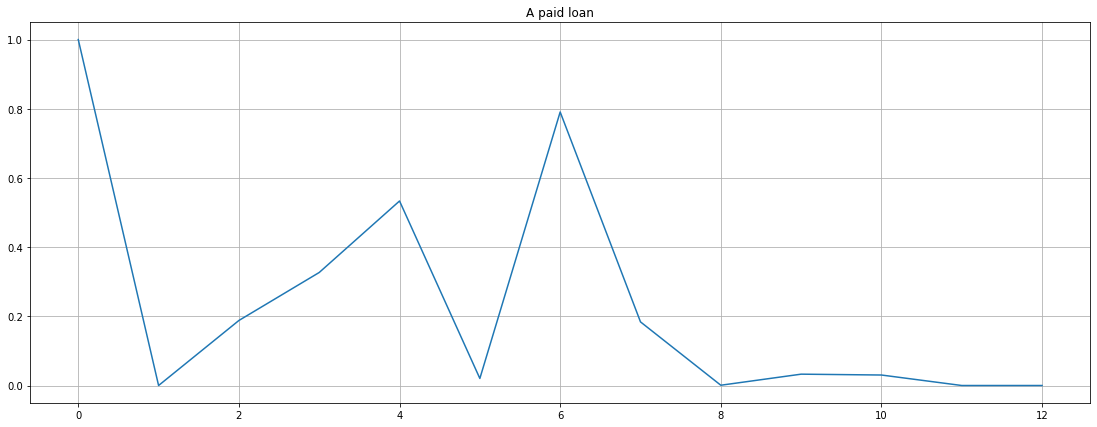

In [ ]:
plt.grid()
plt.plot(np.arange(paid_train_data.shape[1]), paid_train_data[0])
plt.title("A paid loan")
plt.show()

Plot a not paid loan

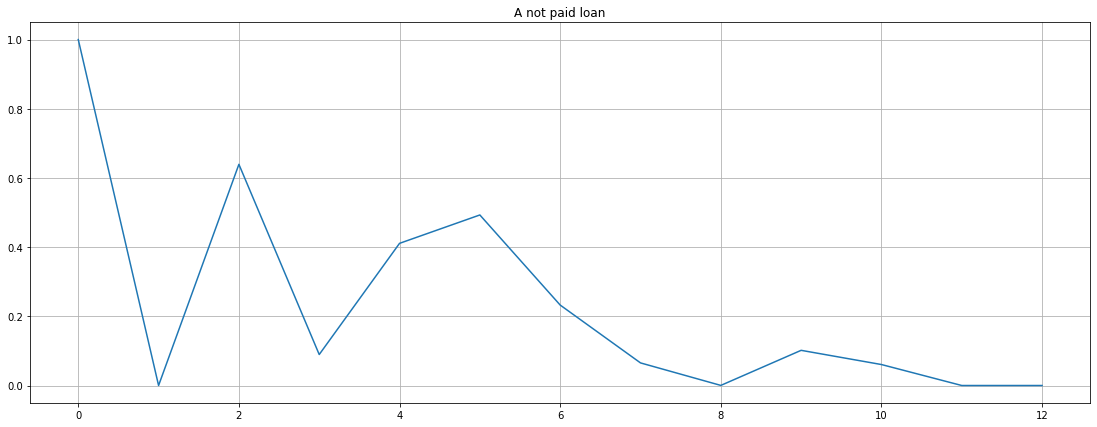

In [ ]:
plt.grid()
plt.plot(np.arange(not_paid_train_data.shape[1]), not_paid_train_data[0])
plt.title("A not paid loan")
plt.show()

##Build the fully connected model

In [ ]:
class PaidLoanDetectorFC():
  def __init__(self, input_size, output_size):
    self.input = Input(shape=(input_size),
                      name="test",
                      dtype=np.float32
                      )
    x = layers.Dense(32, activation="relu")(self.input)
    x = layers.Dense(16, activation="relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(16, activation="relu")(x)
    x = layers.BatchNormalization()(x)
    bottleneck = layers.Dense(10, activation="relu")(x)
    x = layers.BatchNormalization()(bottleneck)
    x = layers.Dense(16, activation="relu")(x)
    x = layers.Dense(16, activation="relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(32, activation="relu")(x)
    x = layers.BatchNormalization()(x)
    self.output = layers.Dense(output_size, activation="sigmoid")(x)

  def getModel(self):
    return Model(self.input, self.output)


###compile

In [ ]:
input_size, output_size = X_train.shape[1], X_train.shape[1]
autoencoder = PaidLoanDetectorFC(input_size, output_size).getModel()

In [ ]:
autoencoder.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 test (InputLayer)           [(None, 13)]              0         
                                                                 
 dense_16 (Dense)            (None, 32)                448       
                                                                 
 dense_17 (Dense)            (None, 16)                528       
                                                                 
 batch_normalization_12 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 dense_18 (Dense)            (None, 16)                272       
                                                                 
 batch_normalization_13 (Bat  (None, 16)               64        
 chNormalization)                                          

In [ ]:
autoencoder.compile(optimizer='adam',
              loss='mse', metrics=['accuracy'])

###Fit

Notice that the autoencoder is trained using only the paid loan, but is evaluated using the full test set.

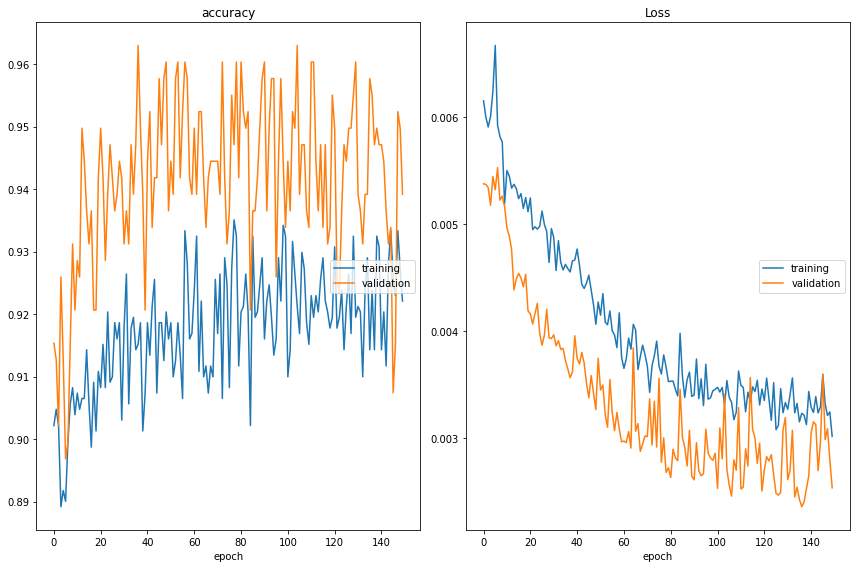

accuracy
	training         	 (min:    0.889, max:    0.935, cur:    0.922)
	validation       	 (min:    0.897, max:    0.963, cur:    0.939)
Loss
	training         	 (min:    0.003, max:    0.007, cur:    0.003)
	validation       	 (min:    0.002, max:    0.006, cur:    0.003)
23/23 [==============================] - 1s 27ms/step - loss: 0.0030 - accuracy: 0.9221 - val_loss: 0.0025 - val_accuracy: 0.9392


In [ ]:
autoencoder.fit(not_paid_train_data, not_paid_train_data,
          epochs=150,
          batch_size=51,
          validation_data=(not_paid_test_data, not_paid_test_data),
          callbacks=[PlotLossesKerasTF()])

We will soon classify a not paid loan as anomalous if the reconstruction error is greater than one standard deviation from the normal training examples. First, let's plot a normal paid loan from the training set, the reconstruction after it's encoded and decoded by the autoencoder, and the reconstruction error.

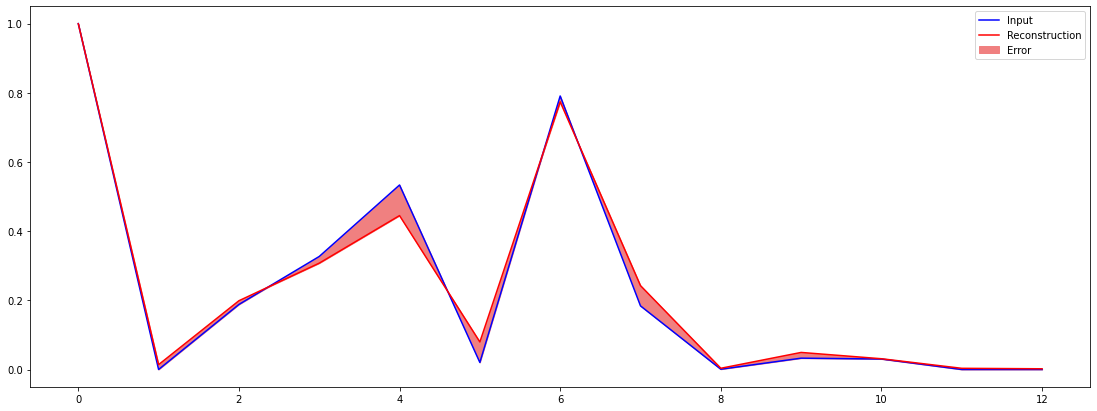

In [ ]:
idx = 0

pred_data = autoencoder.predict(paid_train_data)

plt.plot(paid_train_data[idx], 'b')
plt.plot(pred_data[idx], 'r')
plt.fill_between(np.arange(paid_train_data.shape[1]), pred_data[idx], paid_train_data[idx], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

Create a similar plot, this time for an anomalous test example.

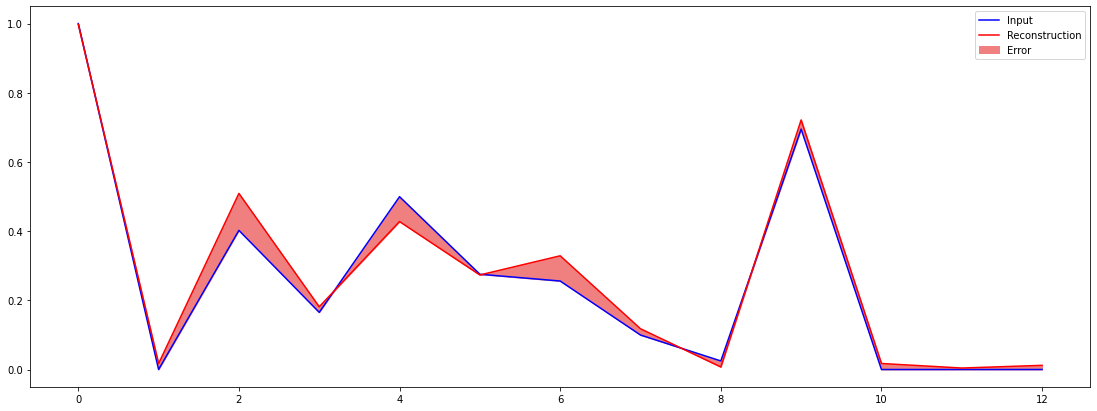

In [ ]:
idx = 2

pred_data = autoencoder.predict(not_paid_train_data)

plt.plot(not_paid_train_data[idx], 'b')
plt.plot(pred_data[idx], 'r')
plt.fill_between(np.arange(not_paid_train_data.shape[1]), pred_data[idx], not_paid_train_data[idx], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

### Detect anomalies

Detect anomalies by calculating whether the reconstruction loss is greater than a fixed threshold. In this tutorial, you will calculate the mean average error for normal examples from the training set, then classify future examples as anomalous if the reconstruction error is higher than one standard deviation from the training set.


Plot the reconstruction error on normal ECGs from the training set

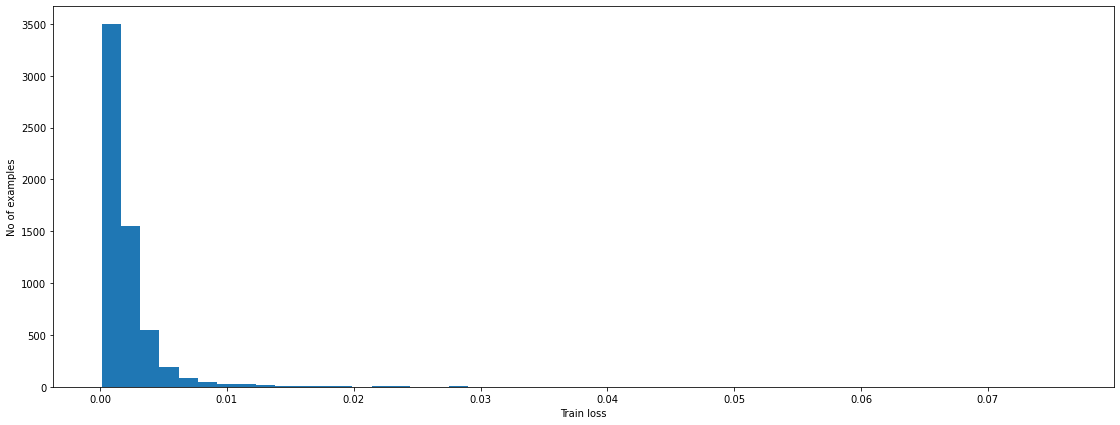

In [ ]:
reconstructions = autoencoder.predict(paid_train_data)
train_loss = losses.mse(reconstructions, paid_train_data)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

Choose a threshold value that is one standard deviations above the mean.

In [ ]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.00963696856133754


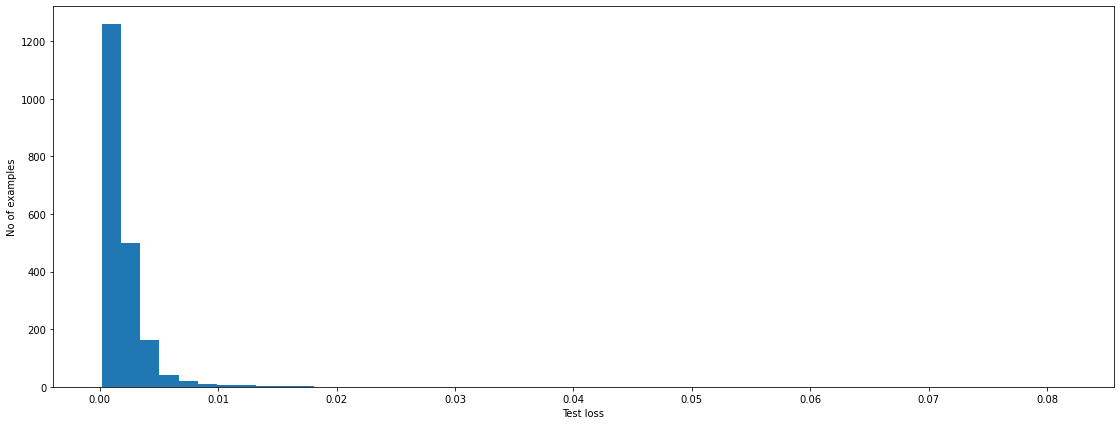

In [ ]:
reconstructions = autoencoder.predict(paid_test_data)
test_loss = losses.mse(reconstructions, paid_test_data)

plt.hist(test_loss[None,:], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

In [ ]:
threshold = np.mean(test_loss) + np.std(test_loss)
print("Threshold: ", threshold)

Threshold:  0.004875824975667758


Note: There are other strategies you could use to select a threshold value above which test examples should be classified as anomalous, the correct approach will depend on your dataset. You can learn more with the links at the end of this tutorial.

If you examine the reconstruction error for the anomalous examples in the test set, you'll notice most have greater reconstruction error than the threshold. By varing the threshold, you can adjust the [precision](https://developers.google.com/machine-learning/glossary#precision) and [recall](https://developers.google.com/machine-learning/glossary#recall) of your classifier.

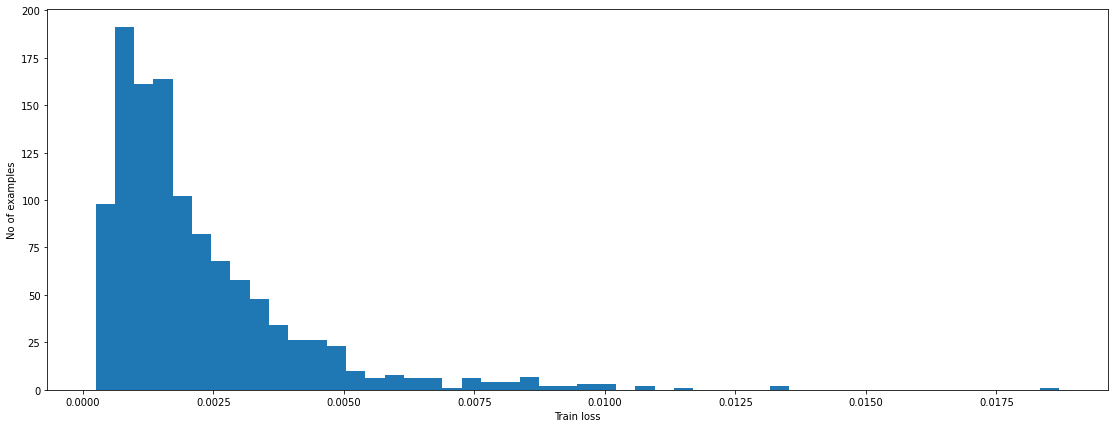

In [ ]:
reconstructions = autoencoder.predict(not_paid_train_data)
train_loss = losses.mse(reconstructions, not_paid_train_data)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [ ]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.004095453263271622


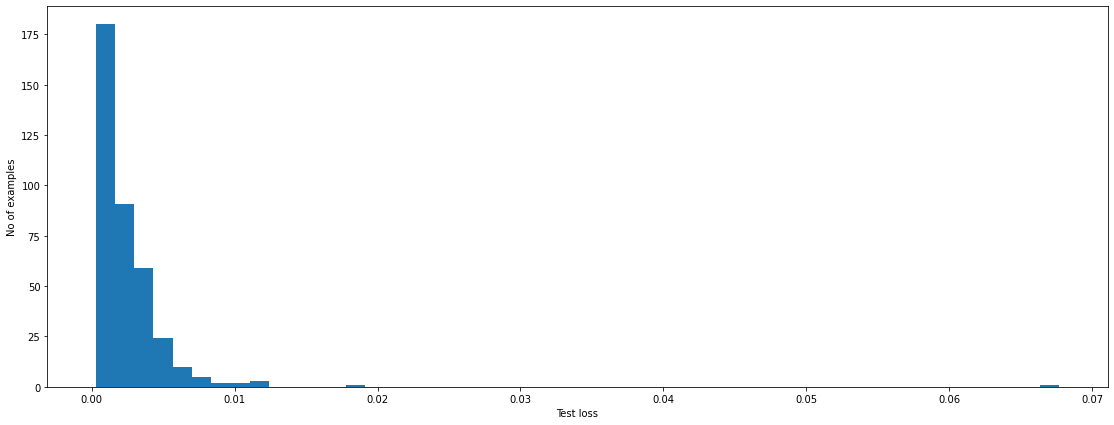

In [ ]:
reconstructions = autoencoder.predict(not_paid_test_data)
test_loss = losses.mse(reconstructions, not_paid_test_data)

plt.hist(test_loss[None,:], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

In [ ]:
threshold = np.mean(test_loss) + np.std(test_loss)
print("Threshold: ", threshold)

Threshold:  0.006475485858725425


Classify an ECG as an anomaly if the reconstruction error is greater than the threshold.

In [ ]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = losses.mse(reconstructions, data)
  return tf.math.less(loss, threshold)


In [ ]:
preds = predict(autoencoder, X_test, threshold)
print_stats(preds, Y_test)

Accuracy = 0.17494780793319414
Precision = 0.1561962134251291
Recall = 0.9603174603174603
Confusion matrix: tp 56, fp 1961, fn 15, tn 363
